# Parabola Estimation

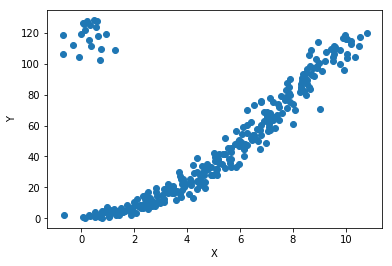

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_and_Y = np.load('./hw4-q1-parabola.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
X1 = np.matrix(np.hstack((np.ones((len(X),1)),
X.reshape(-1,1))))

X2 = np.matrix(np.hstack((X1, (X**2).reshape(-1,1))))
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = 51.07 + -16.06*X + 2.36*Xˆ2


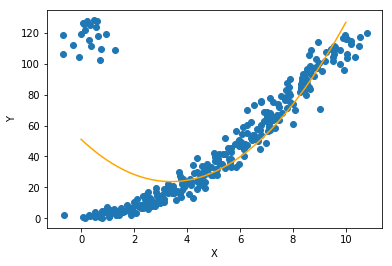

In [4]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
print(X2.shape)

In [5]:
# g'(W)
def g_prime_W(X, Y, W):
    return (np.sign(X.dot(W) - Y).T.dot(X)).T

W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)
# We will keep track of training loss over iterations
iterations = [0]
g_W = [(X2.dot(W) - Y)]
for i in range(300000):
    grad = g_prime_W(X2, Y, W)
    W_new = W - 0.000001 * grad
    iterations.append(i+1)
    g_W.append((X2.dot(W_new) - Y).T.dot(X2.dot(W_new) - Y))
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print("gradient descent terminated after " + str(i) + " iterations")
        break
    W = W_new
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

gradient descent terminated after 41383 iterations
Y = 1.07 + 1.43*X1 + 1.03*X2


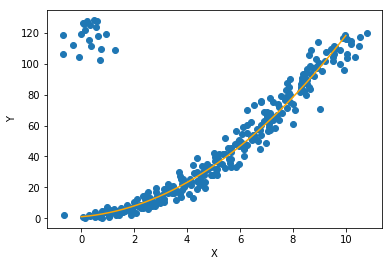

In [6]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [20]:
# g'(W)
def g_prime_Walpha(X, Y, W, alpha):
    return alpha * (X.T.dot(2 * ( X.dot(W) - Y))) + (1-alpha) * ((np.sign(X.dot(W) - Y).T.dot(X)).T)

alpha = 0.5
W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)
# We will keep track of training loss over iterations
iterations = [0]
g_W = [alpha * ((X2.dot(W) - Y).T.dot(X2.dot(W) - Y)) + (1 - alpha) *(X2.dot(W) - Y)]
for i in range(300000):
    grad = g_prime_Walpha(X2, Y, W, alpha)
    W_new = W - 0.000001 * grad
    iterations.append(i+1)
    g_W.append((X2.dot(W_new) - Y).T.dot(X2.dot(W_new) - Y))
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print("gradient descent terminated after " + str(i) + " iterations")
        break
    W = W_new
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

gradient descent terminated after 157048 iterations
Y = 50.47 + -15.83*X1 + 2.34*X2


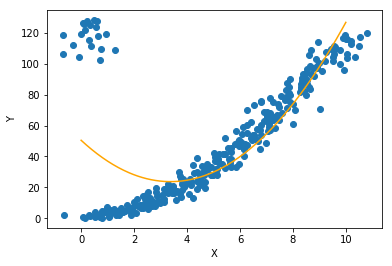

In [21]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()